In [2]:
!pip install --user pipwin

In [3]:
!pip install PyAudio

In [4]:
!pip install SpeechRecognition

In [5]:
!pip install textblob

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import speech_recognition as sr

In [8]:
def mic_speech(recognizer, microphone):

    # check that recognizer and microphone arguments are appropriate type
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")

    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    # adjust the recognizer sensitivity to ambient noise and record audio
    # from the microphone
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source) # #  analyze the audio source for 1 second
        audio = recognizer.listen(source)

    # set up the response object
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }

    # try recognizing the speech in the recording
    # if a RequestError or UnknownValueError exception is caught,
    #   update the response object accordingly
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        # API was unreachable or unresponsive
        response["success"] = False
        response["error"] = "API unavailable/unresponsive"
    except sr.UnknownValueError:
        # speech was unintelligible
        response["error"] = "Unable to recognize speech"

    return response

In [9]:
recognizer = sr.Recognizer()

In [10]:
mic = sr.Microphone(device_index=1)

In [11]:
response = mic_speech(recognizer, mic)

In [12]:
print('\nSuccess : {}\nError   : {}\n\nText from Speech\n{}\n\n{}' \
          .format(response['success'],
                  response['error'],
                  '-'*17,
                  response['transcription']))


Success : True
Error   : None

Text from Speech
-----------------

hello how are you


In [23]:
temp_str = ''
records_all = []
while (temp_str != 'bye' and temp_str!=None):
    print('Please Speak ')
    response = mic_speech(recognizer, mic)
    if response['success']:
        temp_str = response['transcription']
        print('You said :' ,temp_str )
        if (temp_str != 'bye'):
            records_all.append(temp_str)
print('Thank you ')
print('Your complete sentence is')
print(records_all)

Please Speak 
You said : I am happy
Please Speak 
You said : it is a beautiful day
Please Speak 
You said : I am sad
Please Speak 
You said : None
Thank you 
Your complete sentence is
['I am happy', 'it is a beautiful day', 'I am sad', None]


In [24]:
records_all.remove(None)
records_all

['I am happy', 'it is a beautiful day', 'I am sad']

In [15]:
from textblob import TextBlob

In [25]:
def Test_sentiment(sentx):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed text
        analysis = TextBlob(sentx)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return ('positive')
        elif analysis.sentiment.polarity == 0:
            return ('neutral')
        else:
            return ('negative')

In [26]:
# Select from collection
sentimets_total = {'neutral': 0 , 'positive' : 0 , 'negative':0}
for recd_sent in records_all:
    sentiment = Test_sentiment(recd_sent)
    print (sentiment,'===>',recd_sent)
    sentimets_total[sentiment] = sentimets_total[sentiment] + 1
    print('###########################################')
print(sentimets_total)

positive ===> I am happy
###########################################
positive ===> it is a beautiful day
###########################################
negative ===> I am sad
###########################################
{'neutral': 0, 'positive': 2, 'negative': 1}


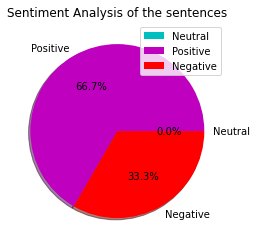

In [27]:
from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r',]

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of the sentences')
plt.legend()
plt.show()